***NBA Draft Combine Measurements:Task 1***

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

**Data collection and analysis**

In [2]:
#Retriving data from csv file
y_all = pd.read_csv("nba_draft_combine_all_years.csv")

In [3]:
def safe_numeric_conversion(value):
    try:
        return pd.to_numeric(value)
    except (ValueError, TypeError):
        return value
y_all = y_all.map(safe_numeric_conversion)

In [4]:
y_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                517 non-null    int64  
 1   Player                    517 non-null    object 
 2   Year                      517 non-null    int64  
 3   Draft pick                384 non-null    float64
 4   Height (No Shoes)         517 non-null    float64
 5   Height (With Shoes)       516 non-null    float64
 6   Wingspan                  517 non-null    float64
 7   Standing reach            517 non-null    float64
 8   Vertical (Max)            450 non-null    float64
 9   Vertical (Max Reach)      450 non-null    float64
 10  Vertical (No Step)        450 non-null    float64
 11  Vertical (No Step Reach)  450 non-null    float64
 12  Weight                    516 non-null    float64
 13  Body Fat                  514 non-null    float64
 14  Hand (Leng

In [5]:
y_all = y_all.drop(columns=['Unnamed: 0'])

In [6]:
null_values = y_all.isnull().sum()
print(null_values)

Player                        0
Year                          0
Draft pick                  133
Height (No Shoes)             0
Height (With Shoes)           1
Wingspan                      0
Standing reach                0
Vertical (Max)               67
Vertical (Max Reach)         67
Vertical (No Step)           67
Vertical (No Step Reach)     67
Weight                        1
Body Fat                      3
Hand (Length)                47
Hand (Width)                 49
Bench                       233
Agility                      73
Sprint                       71
dtype: int64


In [7]:
y_all.describe()

,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
count,517.000000,384.000000,517.000000,516.000000,517.000000,517.000000,450.000000,450.000000,450.000000,450.000000,516.000000,514.000000,470.000000,468.000000,284.000000,444.000000,446.000000
mean,2013.187621,28.492188,77.609284,78.898740,82.497292,103.275629,35.136667,138.166667,29.584444,132.621111,214.833333,7.211673,8.725213,9.399573,10.239437,11.330248,3.299664
std,2.531507,15.888973,3.287633,3.275837,3.943068,4.897515,3.561688,4.272686,3.052361,4.644194,24.683537,2.480823,0.474687,0.732439,4.938390,0.563144,0.128422
min,2009.000000,1.000000,68.250000,69.500000,70.000000,88.500000,25.000000,125.500000,22.500000,119.000000,149.000000,3.200000,7.500000,7.000000,1.000000,10.070000,3.010000
25%,2011.000000,15.000000,75.250000,76.750000,79.750000,100.000000,32.500000,135.500000,27.500000,129.500000,196.000000,5.400000,8.500000,9.000000,6.750000,10.940000,3.200000
50%,2013.000000,28.000000,77.750000,79.000000,82.500000,103.500000,35.000000,138.500000,29.500000,133.000000,213.500000,6.600000,8.750000,9.500000,10.000000,11.255000,3.280000
75%,2015.000000,41.000000,80.000000,81.250000,85.500000,107.000000,37.500000,141.500000,31.500000,136.000000,232.000000,8.400000,9.000000,9.750000,14.000000,11.660000,3.380000
max,2017.000000,60.000000,85.250000,86.500000,92.500000,115.000000,44.500000,147.500000,38.000000,144.000000,303.000000,20.800000,10.250000,12.000000,23.000000,13.440000,3.810000


In [8]:
y_all.head()

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35


In [9]:
y_all.tail()

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
512,Peter Jok,2017,NaN,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.50,NaN,11.34,3.41
513,Rawle Alkins,2017,NaN,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.00,NaN,11.99,3.30
514,Sviatoslav Mykhailiuk,2017,NaN,78.50,79.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.00,9.25,NaN,12.40,3.53
515,Thomas Welsh,2017,NaN,83.50,84.50,84.00,109.5,NaN,NaN,NaN,NaN,254.0,10.9,9.00,10.50,NaN,NaN,NaN
516,V.J. Beachem,2017,NaN,78.25,80.00,82.25,104.5,37.0,141.5,30.0,134.5,193.0,6.8,8.50,9.00,NaN,11.18,3.26


In [10]:
y_all.describe(include='all')

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
count,517,517.000000,384.000000,517.000000,516.000000,517.000000,517.000000,450.000000,450.000000,450.000000,450.000000,516.000000,514.000000,470.000000,468.000000,284.000000,444.000000,446.000000
unique,516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Marcus Thornton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.187621,28.492188,77.609284,78.898740,82.497292,103.275629,35.136667,138.166667,29.584444,132.621111,214.833333,7.211673,8.725213,9.399573,10.239437,11.330248,3.299664
std,NaN,2.531507,15.888973,3.287633,3.275837,3.943068,4.897515,3.561688,4.272686,3.052361,4.644194,24.683537,2.480823,0.474687,0.732439,4.938390,0.563144,0.128422
min,NaN,2009.000000,1.000000,68.250000,69.500000,70.000000,88.500000,25.000000,125.500000,22.500000,119.000000,149.000000,3.200000,7.500000,7.000000,1.000000,10.070000,3.010000
25%,NaN,2011.000000,15.000000,75.250000,76.750000,79.750000,100.000000,32.500000,135.500000,27.500000,129.500000,196.000000,5.400000,8.500000,9.000000,6.750000,10.940000,3.200000
50%,NaN,2013.000000,28.000000,77.750000,79.000000,82.500000,103.500000,35.000000,138.500000,29.500000,133.000000,213.500000,6.600000,8.750000,9.500000,10.000000,11.255000,3.280000
75%,NaN,2015.000000,41.000000,80.000000,81.250000,85.500000,107.000000,37.500000,141.500000,31.500000,136.000000,232.000000,8.400000,9.000000,9.750000,14.000000,11.660000,3.380000


**Data Cleaning**

In [11]:
#creating a dataframe with only picked players
pick_tempered=y_all.copy()
pick_tempered = y_all.dropna(subset=['Draft pick'])
pick_tempered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 493
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    384 non-null    object 
 1   Year                      384 non-null    int64  
 2   Draft pick                384 non-null    float64
 3   Height (No Shoes)         384 non-null    float64
 4   Height (With Shoes)       384 non-null    float64
 5   Wingspan                  384 non-null    float64
 6   Standing reach            384 non-null    float64
 7   Vertical (Max)            332 non-null    float64
 8   Vertical (Max Reach)      332 non-null    float64
 9   Vertical (No Step)        332 non-null    float64
 10  Vertical (No Step Reach)  332 non-null    float64
 11  Weight                    383 non-null    float64
 12  Body Fat                  383 non-null    float64
 13  Hand (Length)             343 non-null    float64
 14  Hand (Width)   

In [12]:
null_values = pick_tempered.isnull().sum()
print(null_values)

Player                        0
Year                          0
Draft pick                    0
Height (No Shoes)             0
Height (With Shoes)           0
Wingspan                      0
Standing reach                0
Vertical (Max)               52
Vertical (Max Reach)         52
Vertical (No Step)           52
Vertical (No Step Reach)     52
Weight                        1
Body Fat                      1
Hand (Length)                41
Hand (Width)                 43
Bench                       162
Agility                      57
Sprint                       54
dtype: int64


In [13]:
#Filling null values with median
numeric_columns = pick_tempered.select_dtypes(include=[np.number]).columns
pick_tempered.loc[:, numeric_columns] = pick_tempered.loc[:, numeric_columns].apply(lambda x: x.fillna(x.median()))

In [14]:
pick_tempered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 493
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    384 non-null    object 
 1   Year                      384 non-null    int64  
 2   Draft pick                384 non-null    float64
 3   Height (No Shoes)         384 non-null    float64
 4   Height (With Shoes)       384 non-null    float64
 5   Wingspan                  384 non-null    float64
 6   Standing reach            384 non-null    float64
 7   Vertical (Max)            384 non-null    float64
 8   Vertical (Max Reach)      384 non-null    float64
 9   Vertical (No Step)        384 non-null    float64
 10  Vertical (No Step Reach)  384 non-null    float64
 11  Weight                    384 non-null    float64
 12  Body Fat                  384 non-null    float64
 13  Hand (Length)             384 non-null    float64
 14  Hand (Width)   

In [15]:
#creating another dataframe from orignal dataset and this time filling all missing values with median except 'Draft pick'
numeric_columns = y_all.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.difference(['Draft pick'])
df_cleaned=y_all.copy()
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].apply(lambda x: x.fillna(x.median()))
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    517 non-null    object 
 1   Year                      517 non-null    int64  
 2   Draft pick                384 non-null    float64
 3   Height (No Shoes)         517 non-null    float64
 4   Height (With Shoes)       517 non-null    float64
 5   Wingspan                  517 non-null    float64
 6   Standing reach            517 non-null    float64
 7   Vertical (Max)            517 non-null    float64
 8   Vertical (Max Reach)      517 non-null    float64
 9   Vertical (No Step)        517 non-null    float64
 10  Vertical (No Step Reach)  517 non-null    float64
 11  Weight                    517 non-null    float64
 12  Body Fat                  517 non-null    float64
 13  Hand (Length)             517 non-null    float64
 14  Hand (Widt

**Correlation Analysis**

Correlations with Draft pick:


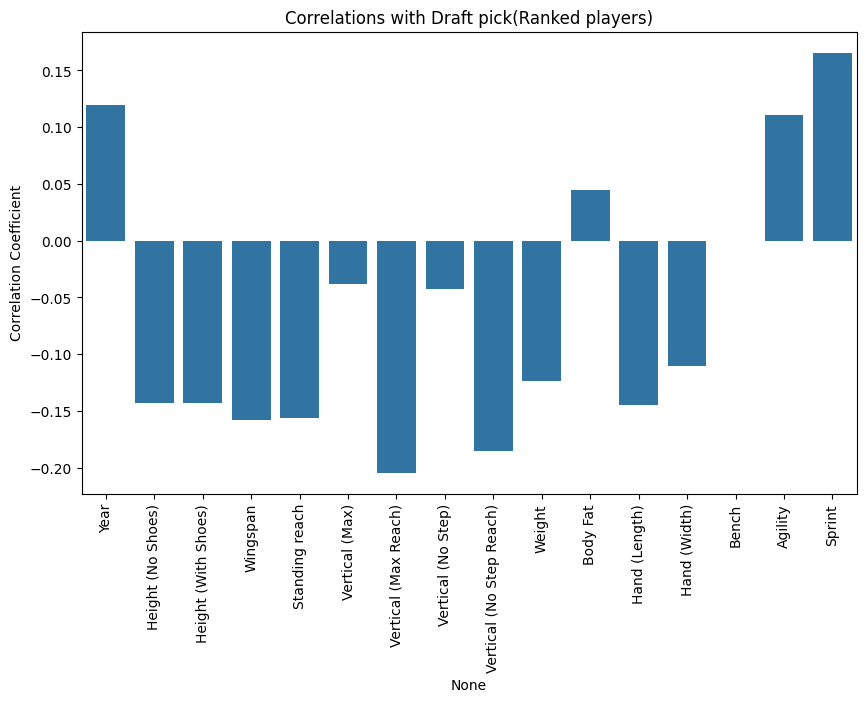

In [16]:
#correlation graph of draft pick with pick_tempered dataset
numeric_columns = pick_tempered.select_dtypes(include=[np.number]).columns
correlation_matrix = pick_tempered[numeric_columns].corr()
draft_pick_correlations = correlation_matrix['Draft pick'].drop('Draft pick')
print("Correlations with Draft pick:")
plt.figure(figsize=(10, 6))
sns.barplot(x=draft_pick_correlations.index, y=draft_pick_correlations.values)
plt.xticks(rotation=90)
plt.title('Correlations with Draft pick(Ranked players)')
plt.ylabel('Correlation Coefficient')
plt.show()

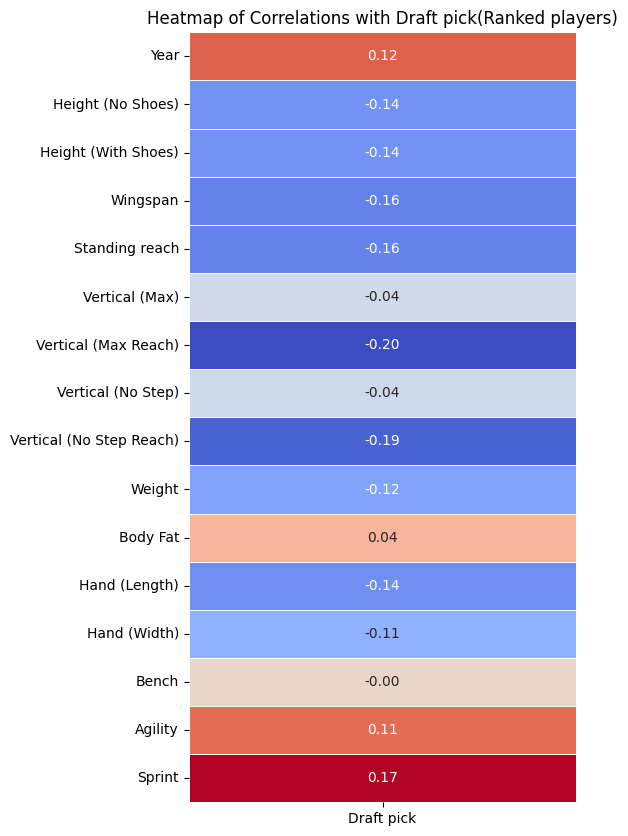

In [17]:
#correlation heatmap of draft pick with pick_tempered dataset
plt.figure(figsize=(5, 10))
sns.heatmap(draft_pick_correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False, linewidths=0.5)
plt.title('Heatmap of Correlations with Draft pick(Ranked players)')
plt.show()

Correlations with Draft pick:


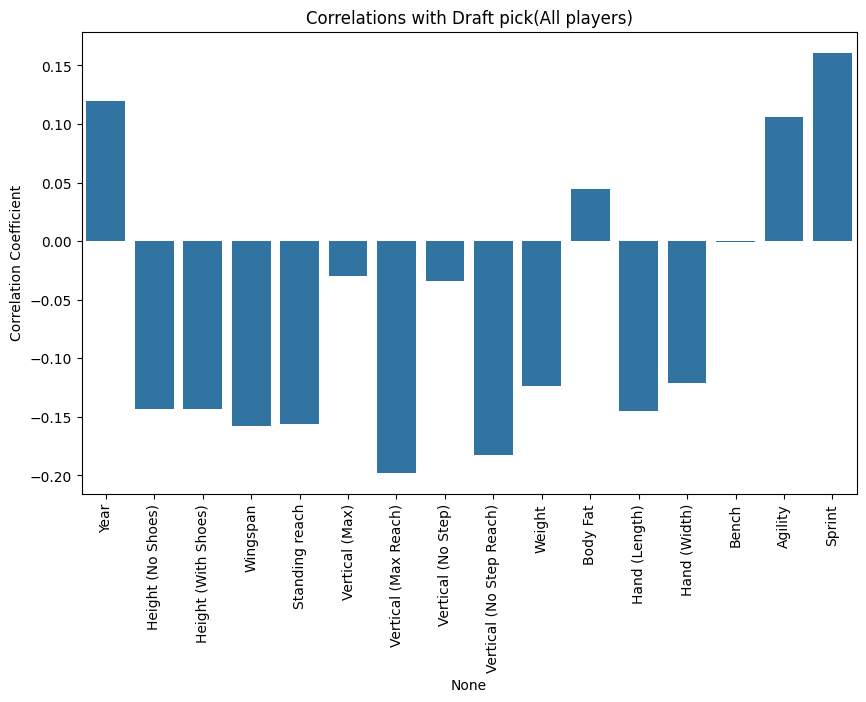

In [18]:
#correlation graph of draft pick with df_cleaned dataset
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
correlation_matrix = df_cleaned[numeric_columns].corr()
draft_pick_correlations = correlation_matrix['Draft pick'].drop('Draft pick')
print("Correlations with Draft pick:")
plt.figure(figsize=(10, 6))
sns.barplot(x=draft_pick_correlations.index, y=draft_pick_correlations.values)
plt.xticks(rotation=90)
plt.title('Correlations with Draft pick(All players)')
plt.ylabel('Correlation Coefficient')
plt.show()

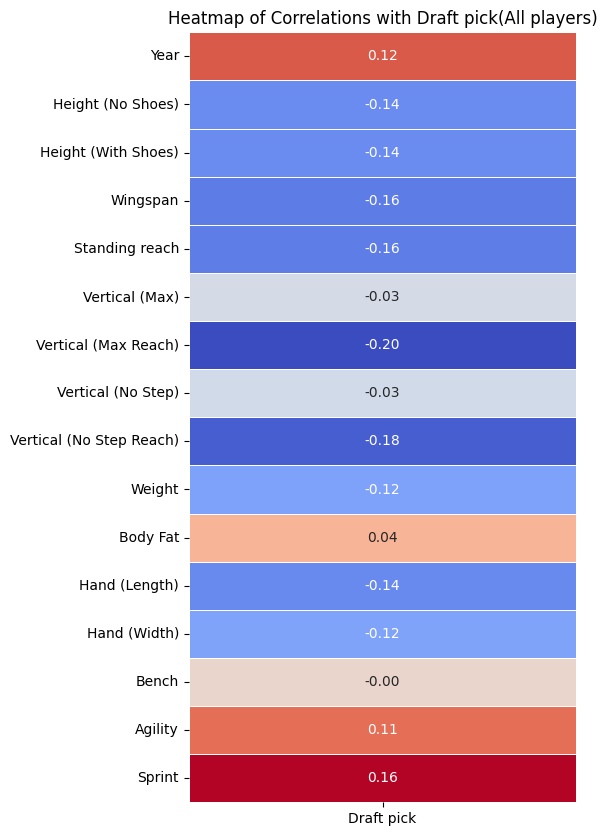

In [19]:
#correlation heatmap of draft pick with df_cleaned dataset
plt.figure(figsize=(5, 10))
sns.heatmap(draft_pick_correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False, linewidths=0.5)
plt.title('Heatmap of Correlations with Draft pick(All players)')
plt.show()

**Feature Engineering**

In [20]:
# Create new features for enhanced analysis in df_cleaned dataframe

# 1. Height Difference (With Shoes - No Shoes)
df_cleaned['Height Difference (With vs. Without Shoes)'] = df_cleaned['Height (With Shoes)'] - df_cleaned['Height (No Shoes)']

# 2. Body Mass Index (BMI)
df_cleaned['Height (With Shoes) in Meters'] = df_cleaned['Height (With Shoes)'] * 0.0254
df_cleaned['BMI'] = df_cleaned['Weight'] / (df_cleaned['Height (With Shoes) in Meters'] ** 2)
df_cleaned.drop(columns=['Height (With Shoes) in Meters'], inplace=True)

# 3. Wingspan-to-Height Ratio
df_cleaned['Wingspan-to-Height Ratio'] = df_cleaned['Wingspan'] / df_cleaned['Height (With Shoes)']

# 4. Standing Reach-to-Height Ratio
df_cleaned['Standing Reach-to-Height Ratio'] = df_cleaned['Standing reach'] / df_cleaned['Height (With Shoes)']

# 5. Vertical Jump Difference
df_cleaned['Vertical Jump Difference'] = df_cleaned['Vertical (Max)'] - df_cleaned['Vertical (No Step)']

# 6. Hand Size
df_cleaned['Hand Size'] = df_cleaned['Hand (Length)'] + df_cleaned['Hand (Width)']

# 7. Agility-to-Sprint Ratio
df_cleaned['Agility-to-Sprint Ratio'] = df_cleaned['Agility'] / df_cleaned['Sprint']

df_cleaned[['Player', 'Year', 'Height (No Shoes)', 'Height (With Shoes)', 'Height Difference (With vs. Without Shoes)', 'Weight', 'BMI','Wingspan-to-Height Ratio','Standing Reach-to-Height Ratio','Vertical Jump Difference','Hand Size','Agility-to-Sprint Ratio']].head()

,Player,Year,Height (No Shoes),Height (With Shoes),Height Difference (With vs. Without Shoes),Weight,BMI,Wingspan-to-Height Ratio,Standing Reach-to-Height Ratio,Vertical Jump Difference,Hand Size,Agility-to-Sprint Ratio
0,Blake Griffin,2009,80.50,82.00,1.50,248.0,57.168467,1.015244,1.280488,3.5,18.25,3.338415
1,Terrence Williams,2009,77.00,78.25,1.25,213.0,53.919205,1.035144,1.322684,6.5,18.25,3.506289
2,Gerald Henderson,2009,76.00,77.00,1.00,215.0,56.206893,1.068182,1.331169,3.5,18.25,3.557325
3,Tyler Hansbrough,2009,80.25,81.50,1.25,234.0,54.605100,1.024540,1.300613,6.5,18.25,3.400612
4,Earl Clark,2009,80.50,82.25,1.75,228.0,52.239090,1.051672,1.331307,4.5,18.25,3.334328


In [21]:
# Create the same features in pick_tempered dataframe
pick_tempered = pick_tempered.copy()
# 1. Height Difference (With Shoes - No Shoes)
pick_tempered['Height Difference (With vs. Without Shoes)'] = pick_tempered['Height (With Shoes)'] - pick_tempered['Height (No Shoes)']

# 2. Body Mass Index (BMI)
pick_tempered['Height (With Shoes) in Meters'] = pick_tempered['Height (With Shoes)'] * 0.0254
pick_tempered['BMI'] = pick_tempered['Weight'] / (pick_tempered['Height (With Shoes) in Meters'] ** 2)
pick_tempered.drop(columns=['Height (With Shoes) in Meters'], inplace=True)

# 3. Wingspan-to-Height Ratio
pick_tempered['Wingspan-to-Height Ratio'] = pick_tempered['Wingspan'] / pick_tempered['Height (With Shoes)']

# 4. Standing Reach-to-Height Ratio
pick_tempered['Standing Reach-to-Height Ratio'] = pick_tempered['Standing reach'] / pick_tempered['Height (With Shoes)']

# 5. Vertical Jump Difference
pick_tempered['Vertical Jump Difference'] = pick_tempered['Vertical (Max)'] - pick_tempered['Vertical (No Step)']

# 6. Hand Size
pick_tempered['Hand Size'] = pick_tempered['Hand (Length)'] + pick_tempered['Hand (Width)']

# 7. Agility-to-Sprint Ratio
pick_tempered['Agility-to-Sprint Ratio'] = pick_tempered['Agility'] / pick_tempered['Sprint']

# View the relevant columns
pick_tempered[['Player', 'Year', 'Height (No Shoes)', 'Height (With Shoes)', 'Height Difference (With vs. Without Shoes)', 'Weight', 'BMI', 'Wingspan-to-Height Ratio', 'Standing Reach-to-Height Ratio', 'Vertical Jump Difference', 'Hand Size', 'Agility-to-Sprint Ratio']].head()


,Player,Year,Height (No Shoes),Height (With Shoes),Height Difference (With vs. Without Shoes),Weight,BMI,Wingspan-to-Height Ratio,Standing Reach-to-Height Ratio,Vertical Jump Difference,Hand Size,Agility-to-Sprint Ratio
0,Blake Griffin,2009,80.50,82.00,1.50,248.0,57.168467,1.015244,1.280488,3.5,18.0,3.338415
1,Terrence Williams,2009,77.00,78.25,1.25,213.0,53.919205,1.035144,1.322684,6.5,18.0,3.506289
2,Gerald Henderson,2009,76.00,77.00,1.00,215.0,56.206893,1.068182,1.331169,3.5,18.0,3.557325
3,Tyler Hansbrough,2009,80.25,81.50,1.25,234.0,54.605100,1.024540,1.300613,6.5,18.0,3.400612
4,Earl Clark,2009,80.50,82.25,1.75,228.0,52.239090,1.051672,1.331307,4.5,18.0,3.334328


**Exploratory Data Analysis (EDA)**

In [22]:
# Grouping the data by Year and calculating summary statistics for each attribute
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
yearly_summary = df_cleaned[numeric_columns].groupby('Year').agg(['mean', 'median', 'std'])

# Display the summary statistics
for column in yearly_summary.columns.levels[0]:
    print(f"Statistics for column: {column}")
    print("Year | Mean | Median | Std Dev")
    print("-" * 40)
    means = yearly_summary[(column, 'mean')]
    medians = yearly_summary[(column, 'median')]
    stds = yearly_summary[(column, 'std')]
    
    for year in yearly_summary.index:
        print(f"{year} | {means[year]:.2f} | {medians[year]:.2f} | {stds[year]:.2f}")
    
    print("\n")

Statistics for column: Draft pick
Year | Mean | Median | Std Dev
----------------------------------------
2009 | 25.55 | 24.50 | 15.16
2010 | 25.44 | 23.00 | 16.90
2011 | 28.84 | 29.00 | 15.69
2012 | 26.70 | 26.50 | 15.99
2013 | 28.55 | 28.00 | 16.19
2014 | 31.23 | 33.00 | 17.08
2015 | 27.85 | 26.00 | 14.99
2016 | 31.36 | 30.50 | 16.52
2017 | 31.59 | 32.00 | 14.02


Statistics for column: Height (No Shoes)
Year | Mean | Median | Std Dev
----------------------------------------
2009 | 77.09 | 77.25 | 3.38
2010 | 78.48 | 78.88 | 3.02
2011 | 77.35 | 78.00 | 3.14
2012 | 77.97 | 78.00 | 3.02
2013 | 77.47 | 77.38 | 3.73
2014 | 77.13 | 77.25 | 3.21
2015 | 77.36 | 77.25 | 3.26
2016 | 77.84 | 78.25 | 3.42
2017 | 77.85 | 78.00 | 3.28


Statistics for column: Height (With Shoes)
Year | Mean | Median | Std Dev
----------------------------------------
2009 | 78.28 | 78.50 | 3.39
2010 | 79.79 | 80.12 | 3.00
2011 | 78.73 | 79.25 | 3.06
2012 | 79.25 | 79.50 | 3.08
2013 | 78.80 | 79.00 | 3.74
2014 | 78

In [23]:
numeric_columns = pick_tempered.select_dtypes(include=[np.number]).columns
yearly_summary = pick_tempered[numeric_columns].groupby('Year').agg(['mean', 'median', 'std'])

# Display the summary statistics
for column in yearly_summary.columns.levels[0]:
    print(f"Statistics for column: {column}")
    print("Year | Mean | Median | Std Dev")
    print("-" * 40)

    means = yearly_summary[(column, 'mean')]
    medians = yearly_summary[(column, 'median')]
    stds = yearly_summary[(column, 'std')]
    
    for year in yearly_summary.index:
        print(f"{year} | {means[year]:.2f} | {medians[year]:.2f} | {stds[year]:.2f}")
    
    print("\n")

Statistics for column: Draft pick
Year | Mean | Median | Std Dev
----------------------------------------
2009 | 25.55 | 24.50 | 15.16
2010 | 25.44 | 23.00 | 16.90
2011 | 28.84 | 29.00 | 15.69
2012 | 26.70 | 26.50 | 15.99
2013 | 28.55 | 28.00 | 16.19
2014 | 31.23 | 33.00 | 17.08
2015 | 27.85 | 26.00 | 14.99
2016 | 31.36 | 30.50 | 16.52
2017 | 31.59 | 32.00 | 14.02


Statistics for column: Height (No Shoes)
Year | Mean | Median | Std Dev
----------------------------------------
2009 | 77.01 | 77.25 | 3.46
2010 | 78.75 | 79.25 | 2.84
2011 | 77.20 | 78.00 | 3.32
2012 | 78.29 | 78.25 | 2.80
2013 | 77.51 | 76.88 | 3.90
2014 | 77.07 | 77.00 | 2.77
2015 | 77.68 | 77.25 | 3.00
2016 | 78.12 | 78.38 | 3.74
2017 | 77.56 | 77.50 | 3.26


Statistics for column: Height (With Shoes)
Year | Mean | Median | Std Dev
----------------------------------------
2009 | 78.23 | 78.50 | 3.49
2010 | 80.01 | 80.50 | 2.86
2011 | 78.60 | 79.25 | 3.23
2012 | 79.59 | 79.50 | 2.83
2013 | 78.82 | 78.25 | 3.97
2014 | 78

Correlations with Draft pick:


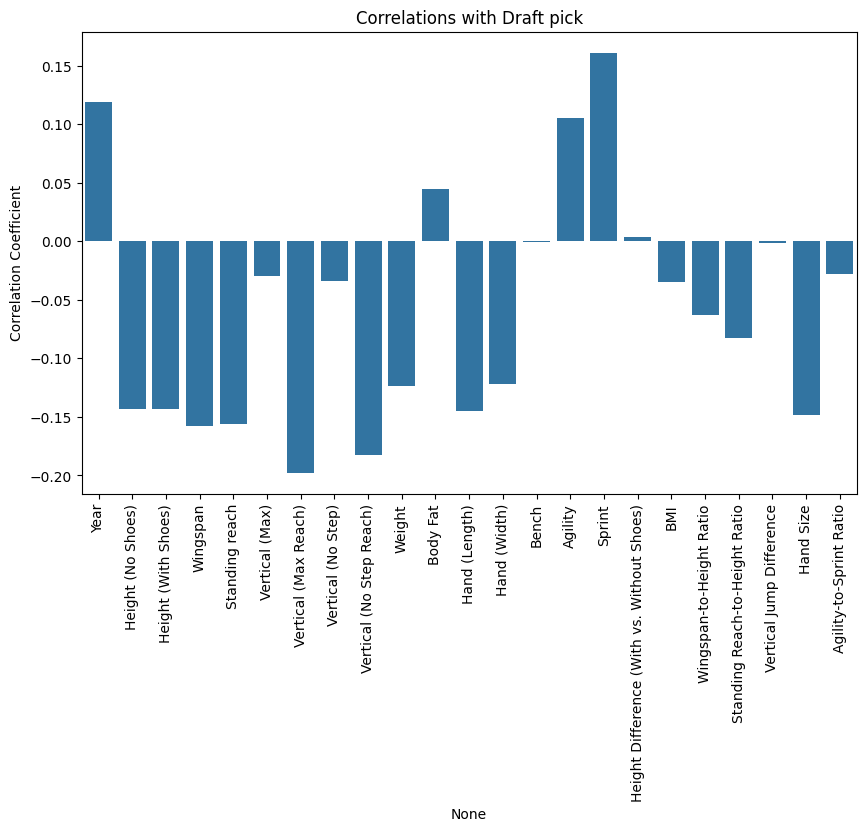

In [24]:
#correlation of draft pick with new features in the dataset
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
correlation_matrix = df_cleaned[numeric_columns].corr()
draft_pick_correlations = correlation_matrix['Draft pick'].drop('Draft pick')

#correlation graph of draft pick with new features in the dataset
print("Correlations with Draft pick:")
plt.figure(figsize=(10, 6))
sns.barplot(x=draft_pick_correlations.index, y=draft_pick_correlations.values)
plt.xticks(rotation=90)
plt.title('Correlations with Draft pick')
plt.ylabel('Correlation Coefficient')
plt.show()

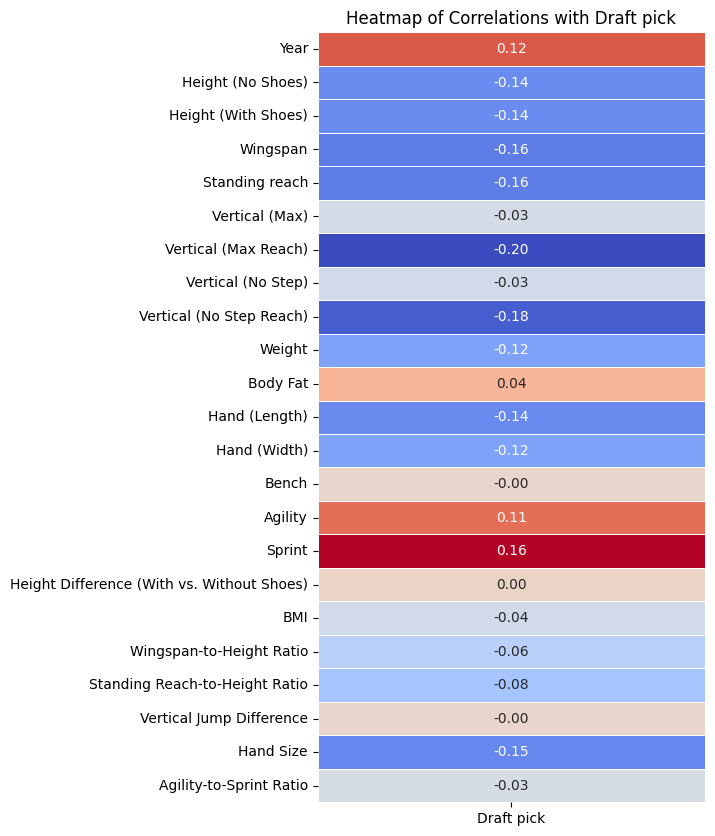

In [25]:
#correlation heatmap of draft pick with new features in the dataset
plt.figure(figsize=(5, 10))
sns.heatmap(draft_pick_correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False, linewidths=0.5)
plt.title('Heatmap of Correlations with Draft pick')
plt.show()

**Year-wise Comparison**

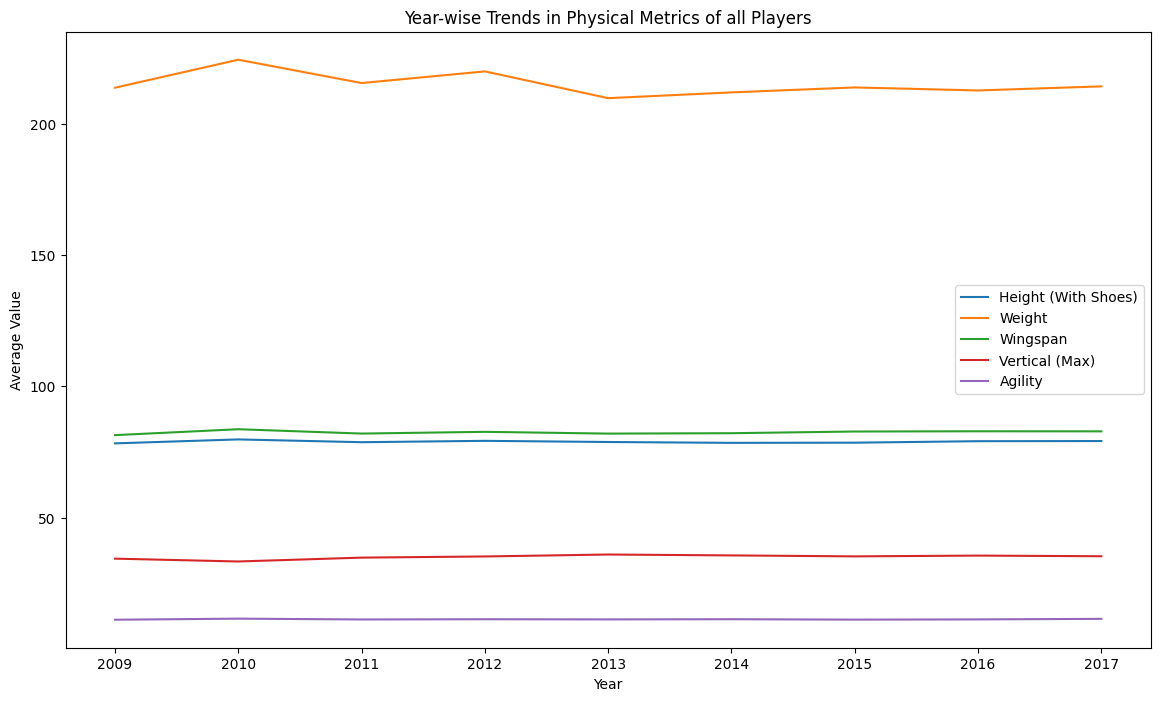

In [26]:
# Grouping the data by Year and calculating the mean of each attribute
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
yearly_trends = df_cleaned[numeric_columns].groupby('Year').mean()

# Plotting the trends for specific attributes over the years
plt.figure(figsize=(14, 8))
for column in ['Height (With Shoes)', 'Weight', 'Wingspan', 'Vertical (Max)', 'Agility']:
    sns.lineplot(data=yearly_trends, x=yearly_trends.index, y=column, label=column)

plt.title('Year-wise Trends in Physical Metrics of all Players')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.show()


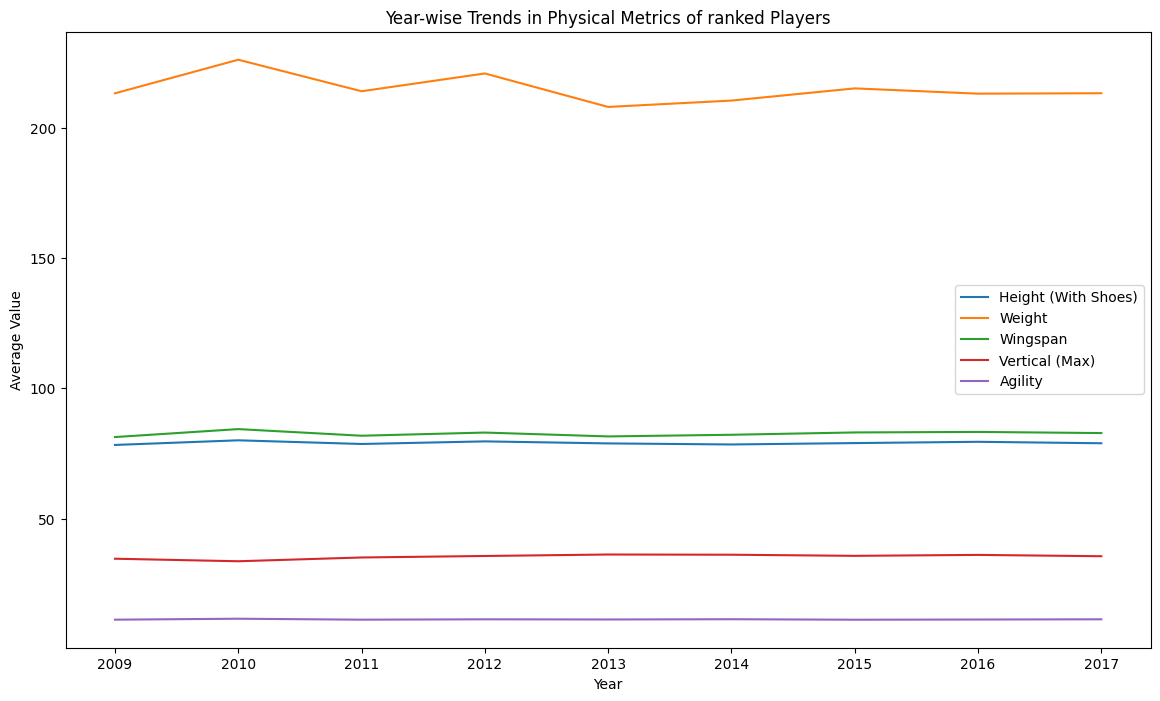

In [27]:
# Grouping the data by Year and calculating the mean of each attribute
numeric_columns = pick_tempered.select_dtypes(include=[np.number]).columns
yearly_trends = pick_tempered[numeric_columns].groupby('Year').mean()

# Plotting the trends for specific attributes over the years
plt.figure(figsize=(14, 8))
for column in ['Height (With Shoes)', 'Weight', 'Wingspan', 'Vertical (Max)', 'Agility']:
    sns.lineplot(data=yearly_trends, x=yearly_trends.index, y=column, label=column)

plt.title('Year-wise Trends in Physical Metrics of ranked Players')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.show()


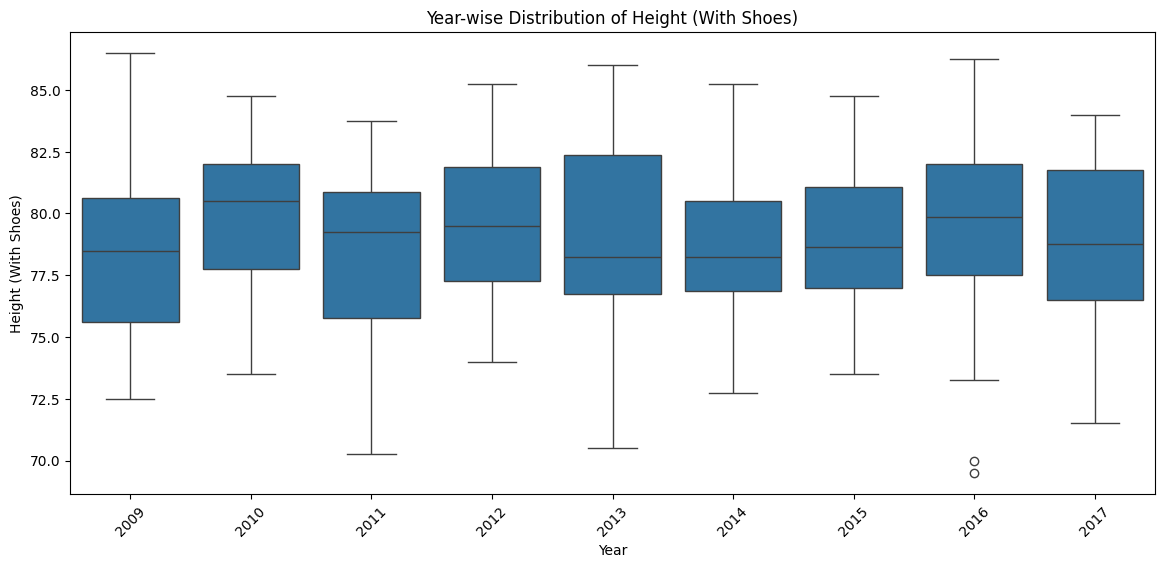

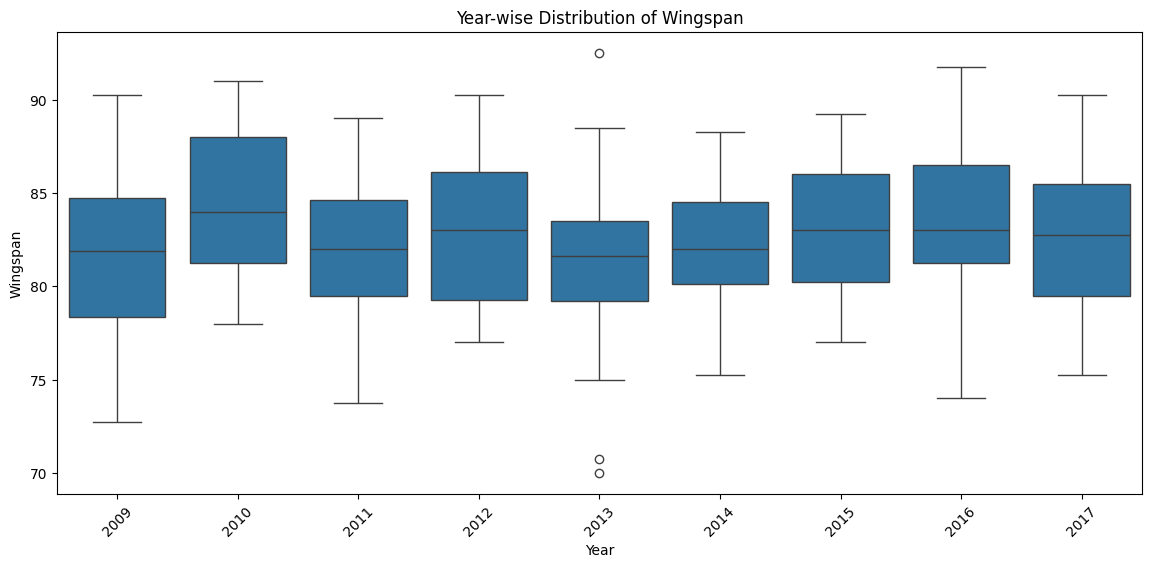

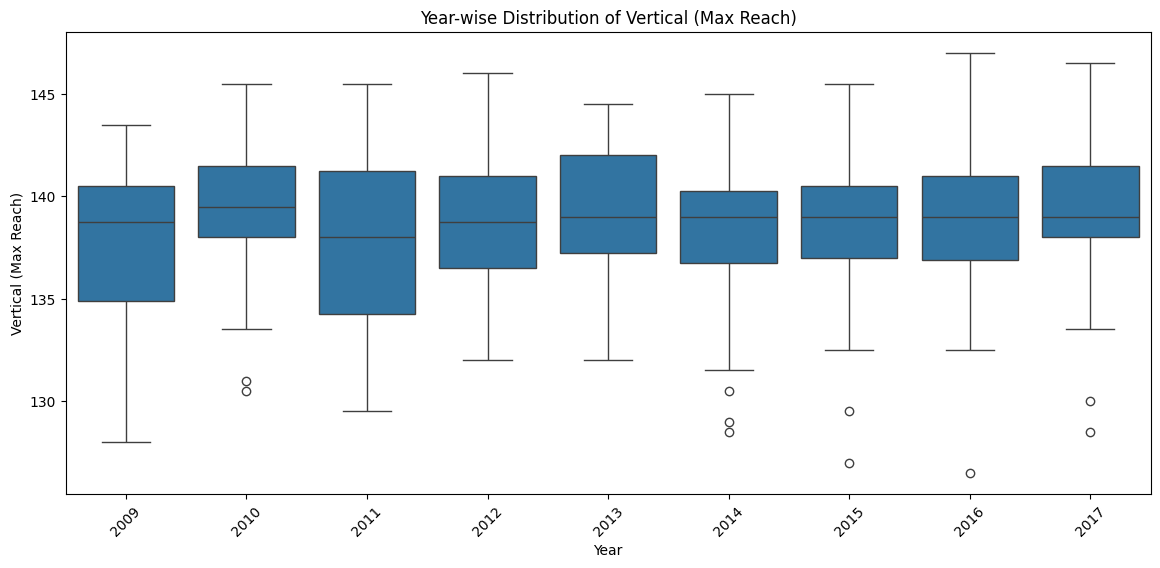

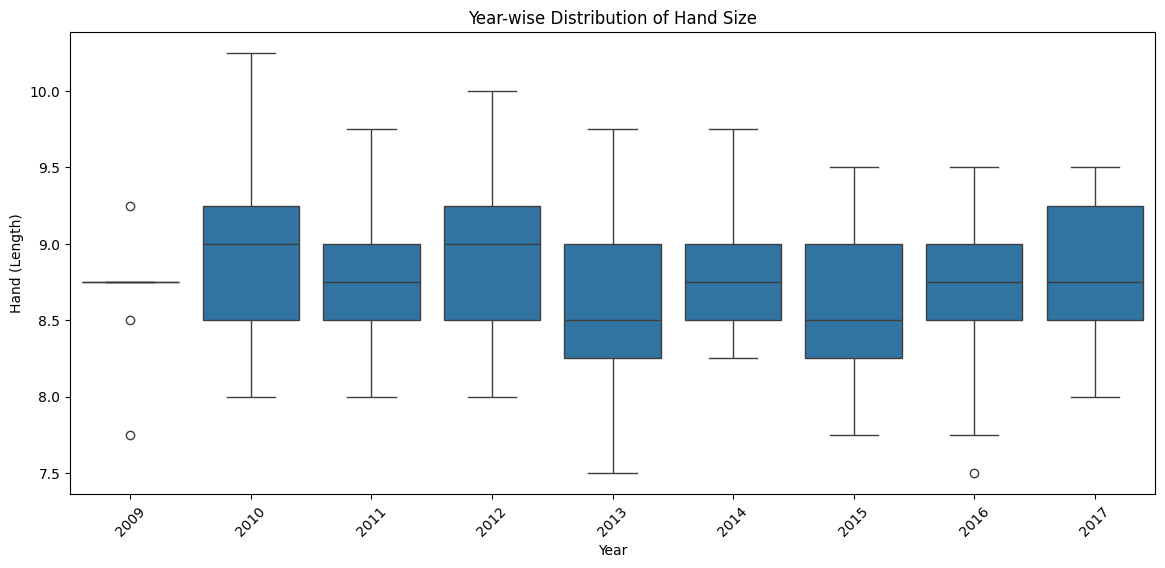

In [28]:
# Year-wise distribution of Height (With Shoes)
plt.figure(figsize=(14, 6))
sns.boxplot(x='Year', y='Height (With Shoes)', data=pick_tempered)
plt.title('Year-wise Distribution of Height (With Shoes)')
plt.xticks(rotation=45)
plt.show()

# Year-wise distribution of Wingspan
plt.figure(figsize=(14, 6))
sns.boxplot(x='Year', y='Wingspan', data=pick_tempered)
plt.title('Year-wise Distribution of Wingspan')
plt.xticks(rotation=45)
plt.show()

# Year-wise distribution of Vertical (Max Reach)
plt.figure(figsize=(14, 6))
sns.boxplot(x='Year', y='Vertical (Max Reach)', data=pick_tempered)
plt.title('Year-wise Distribution of Vertical (Max Reach)')
plt.xticks(rotation=45)
plt.show()

# Year-wise distribution of Hand Size
plt.figure(figsize=(14, 6))
sns.boxplot(x='Year', y='Hand (Length)', data=pick_tempered)
plt.title('Year-wise Distribution of Hand Size')
plt.xticks(rotation=45)
plt.show()


**Key Metrics and Factors affecting draft pick position**

In [29]:
# Selecting relevant features and the target variable
features = pick_tempered[['Height (With Shoes)', 'Weight', 'Wingspan', 'Vertical (Max)', 'Body Fat']]
target = pick_tempered['Draft pick']

# Dropping rows with missing values
features = features.dropna()
target = target[features.index]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating and fitting the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
coefficients = model.coef_
for i, col in enumerate(features.columns):
    print(f"Coefficient for {col}: {coefficients[i]}")


Coefficient for Height (With Shoes): -0.13102868226907236
Coefficient for Weight: -0.03718150698240486
Coefficient for Wingspan: -0.48212933168234484
Coefficient for Vertical (Max): -0.5744198911677091
Coefficient for Body Fat: 0.911438670823994


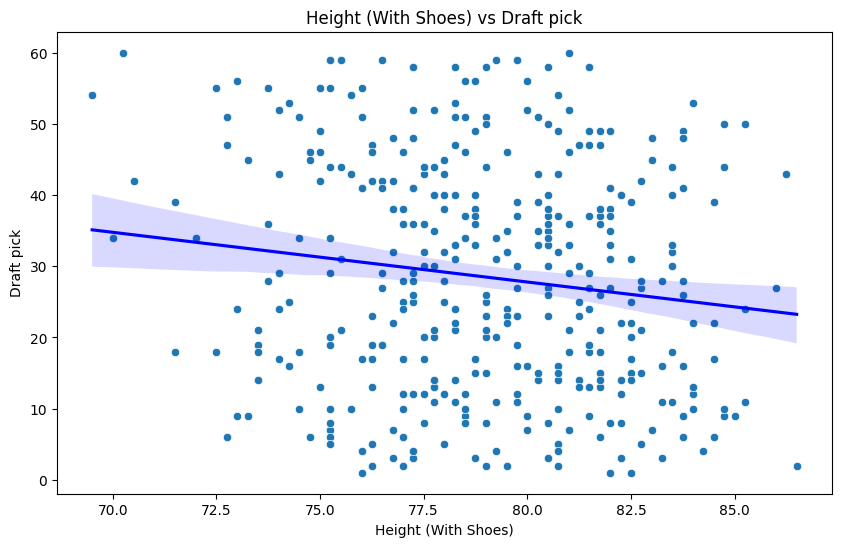

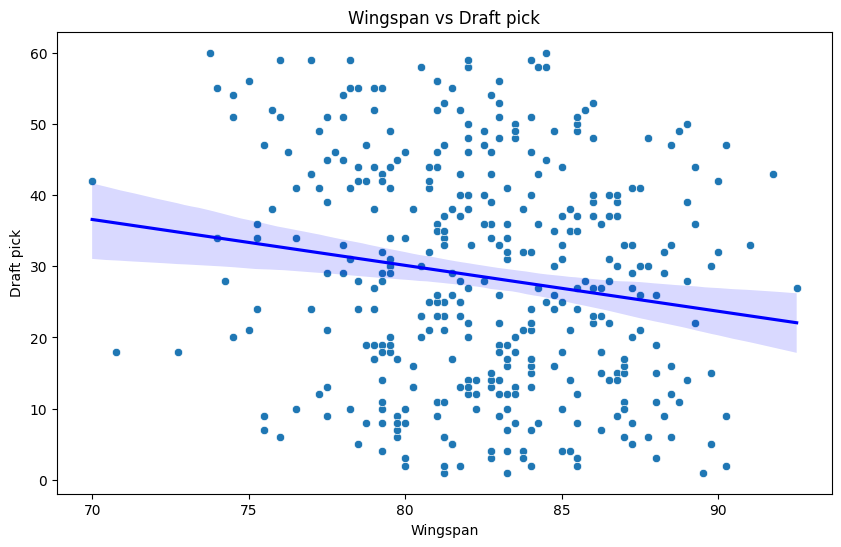

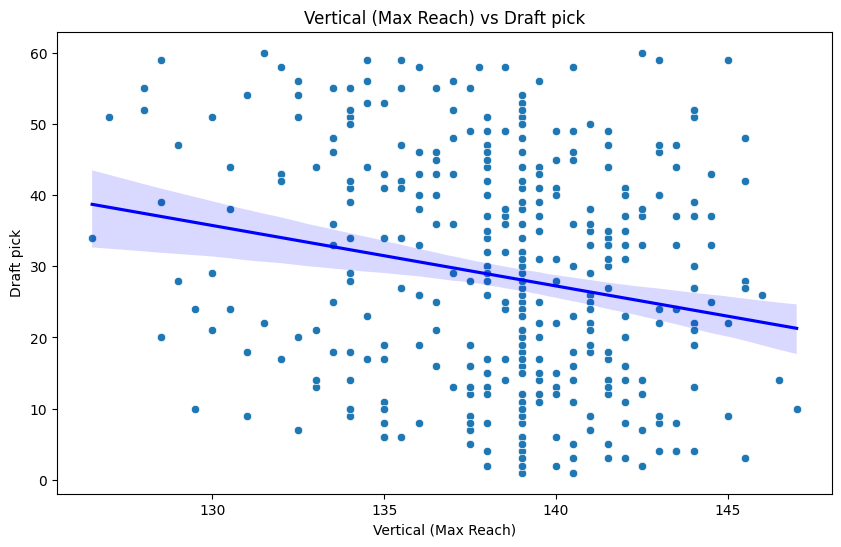

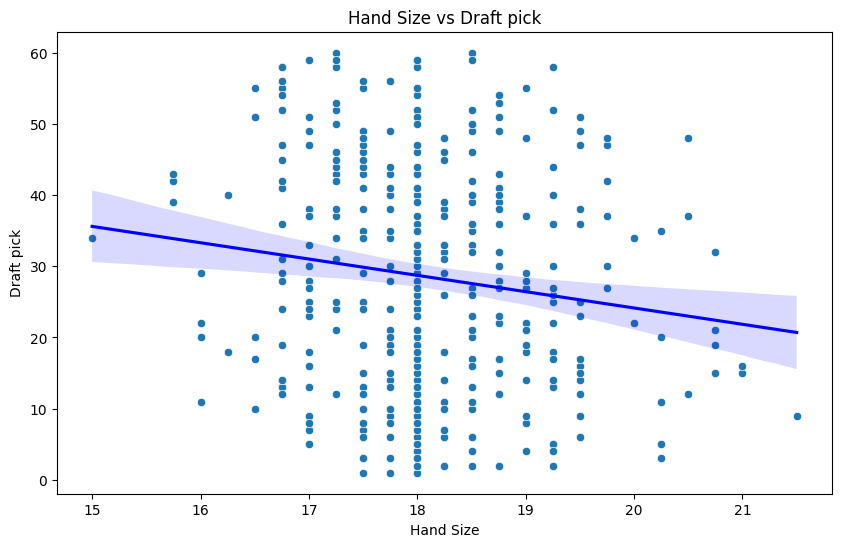

In [30]:
# Relationships between attributes and Draft pick

# Scatter plot: Height (With Shoes) vs Draft pick
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height (With Shoes)', y='Draft pick', data=pick_tempered)
sns.regplot(x='Height (With Shoes)', y='Draft pick', data=pick_tempered, scatter=False, color='blue')
plt.title('Height (With Shoes) vs Draft pick')
plt.xlabel('Height (With Shoes)')
plt.ylabel('Draft pick')
plt.show()


# Scatter plot: Wingspan vs Draft pick
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wingspan', y='Draft pick', data=pick_tempered)
sns.regplot(x='Wingspan', y='Draft pick', data=pick_tempered, scatter=False, color='blue')
plt.title('Wingspan vs Draft pick')
plt.xlabel('Wingspan')
plt.ylabel('Draft pick')
plt.show()


# Scatter plot: Vertical (Max Reach) vs Draft pick
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vertical (Max Reach)', y='Draft pick', data=pick_tempered)
sns.regplot(x='Vertical (Max Reach)', y='Draft pick', data=pick_tempered, scatter=False, color='blue')
plt.title('Vertical (Max Reach) vs Draft pick')
plt.xlabel('Vertical (Max Reach)')
plt.ylabel('Draft pick')
plt.show()


# Scatter plot: Hand Size vs Draft pick
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hand Size', y='Draft pick', data=pick_tempered)
sns.regplot(x='Hand Size', y='Draft pick', data=pick_tempered, scatter=False, color='blue')
plt.title('Hand Size vs Draft pick')
plt.xlabel('Hand Size')
plt.ylabel('Draft pick')
plt.show()




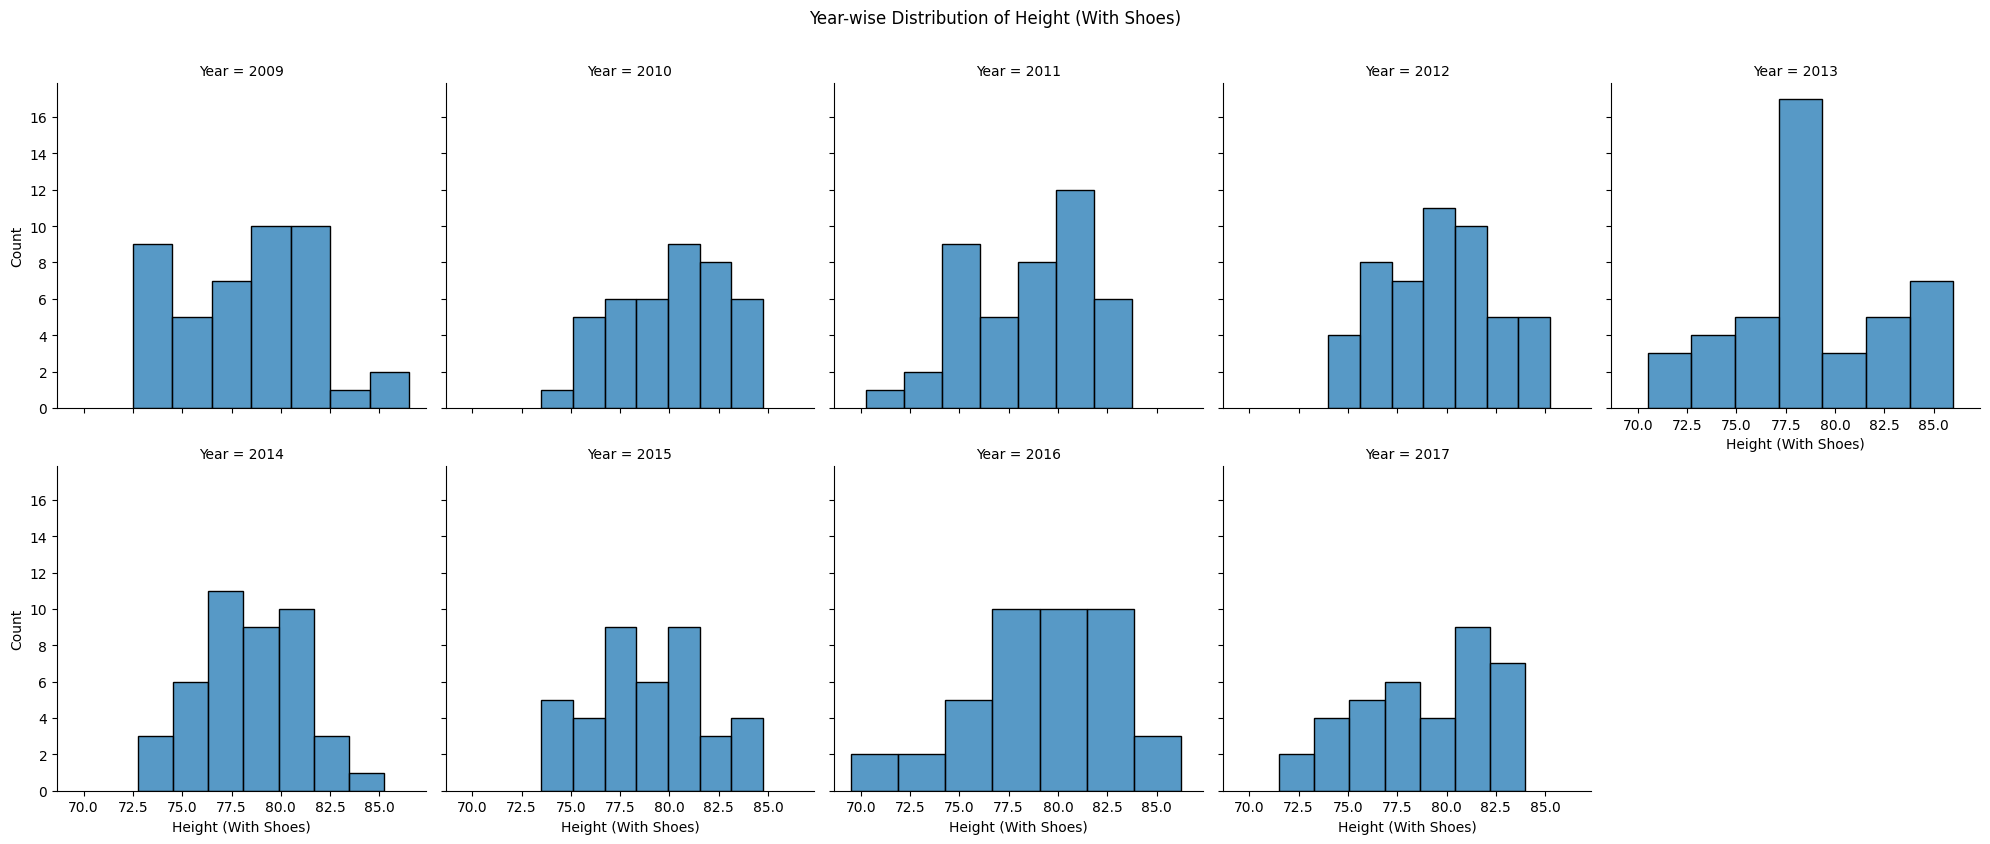

In [31]:
g = sns.FacetGrid(pick_tempered, col="Year", col_wrap=5, height=4)
g.map(sns.histplot, "Height (With Shoes)")
g.fig.suptitle('Year-wise Distribution of Height (With Shoes)', y=1.05)
plt.show()


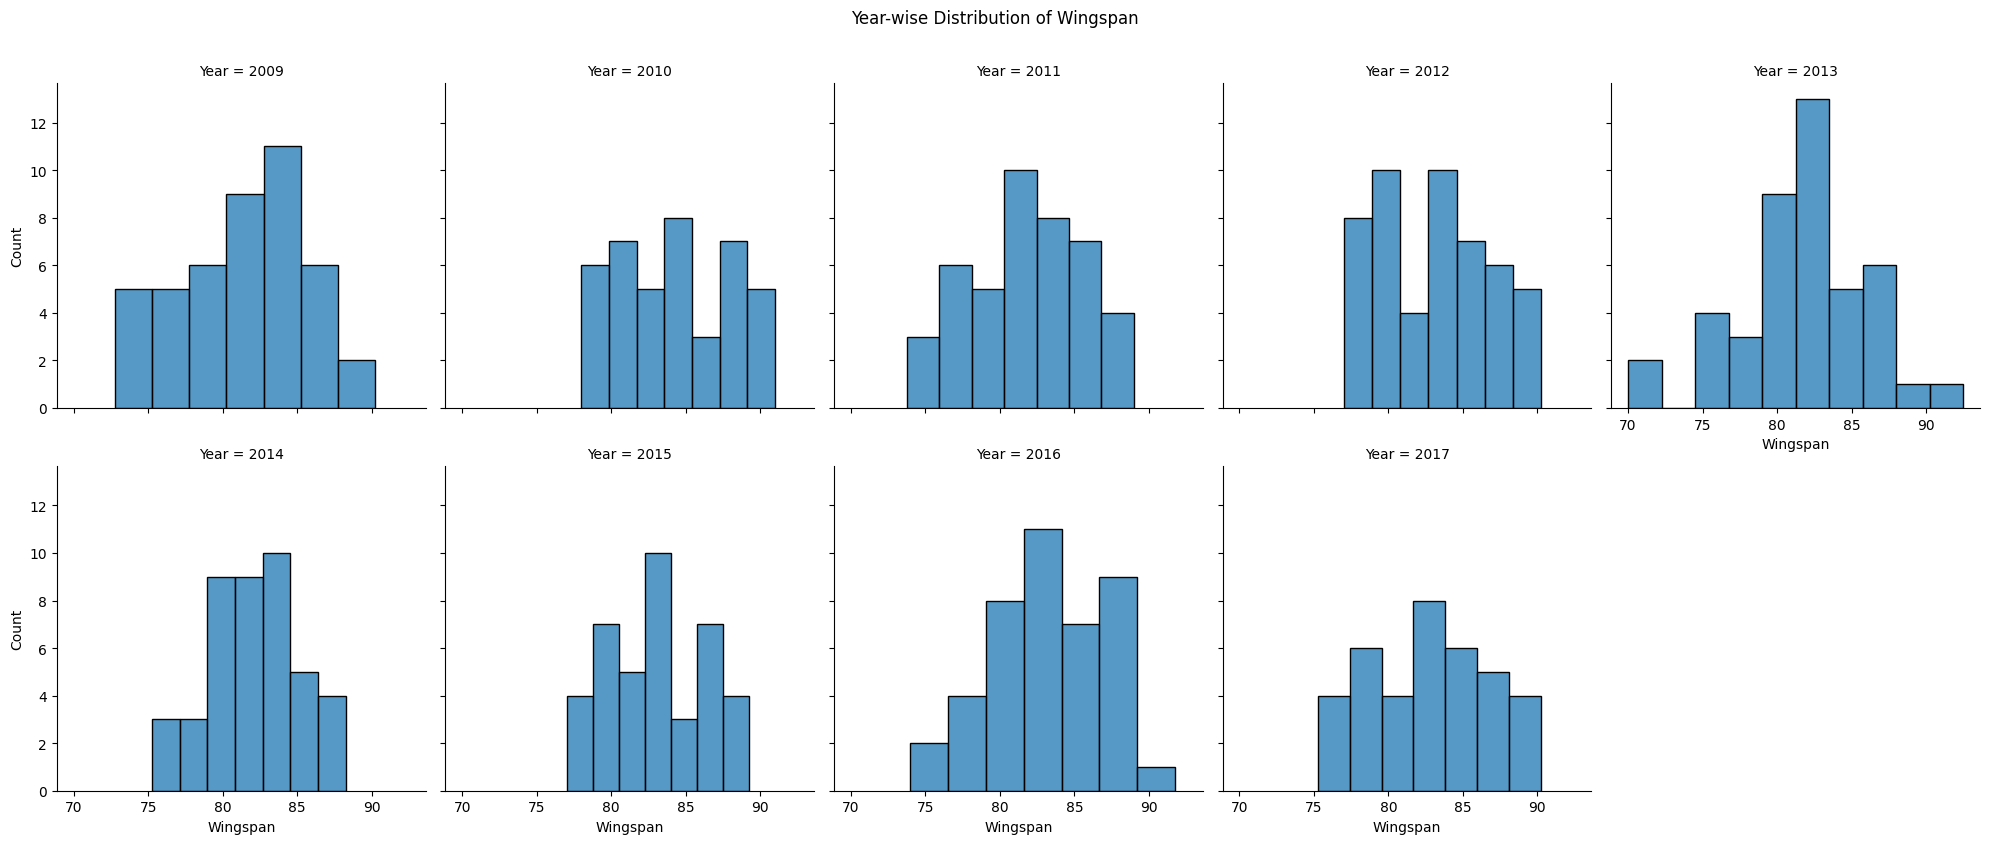

In [32]:
g = sns.FacetGrid(pick_tempered, col="Year", col_wrap=5, height=4)
g.map(sns.histplot, "Wingspan")
g.fig.suptitle('Year-wise Distribution of Wingspan', y=1.05)
plt.show()

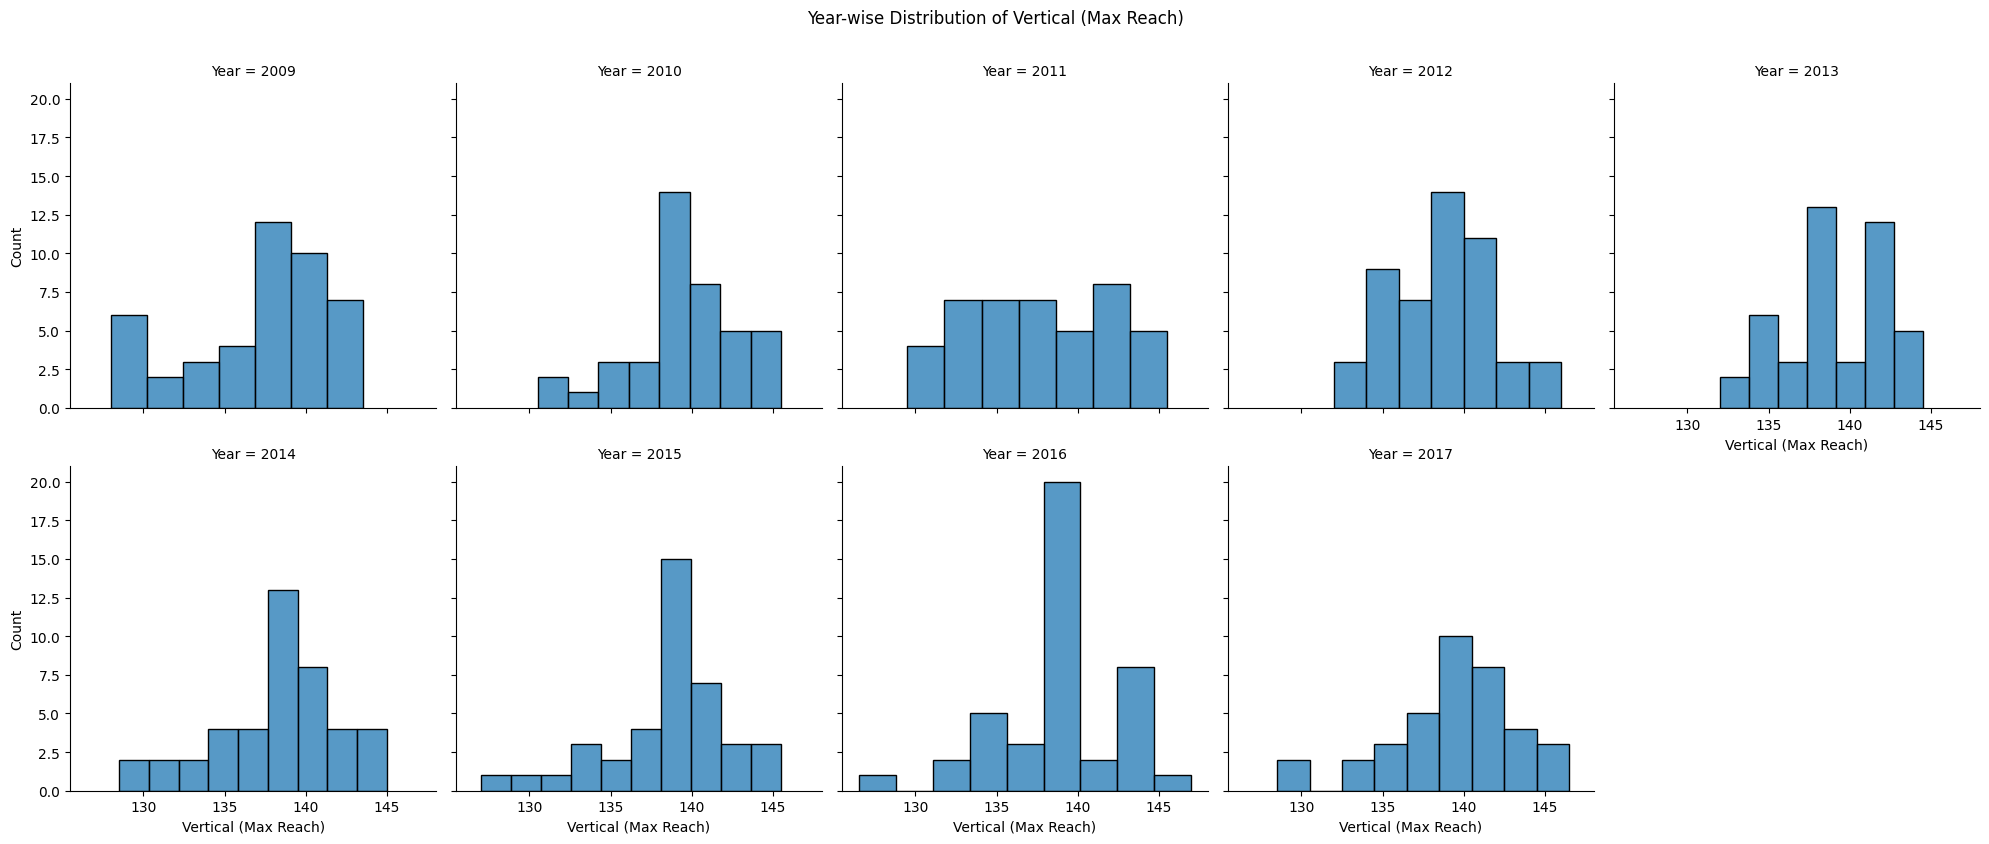

In [33]:
g = sns.FacetGrid(pick_tempered, col="Year", col_wrap=5, height=4)
g.map(sns.histplot, "Vertical (Max Reach)")
g.fig.suptitle('Year-wise Distribution of Vertical (Max Reach)', y=1.05)
plt.show()

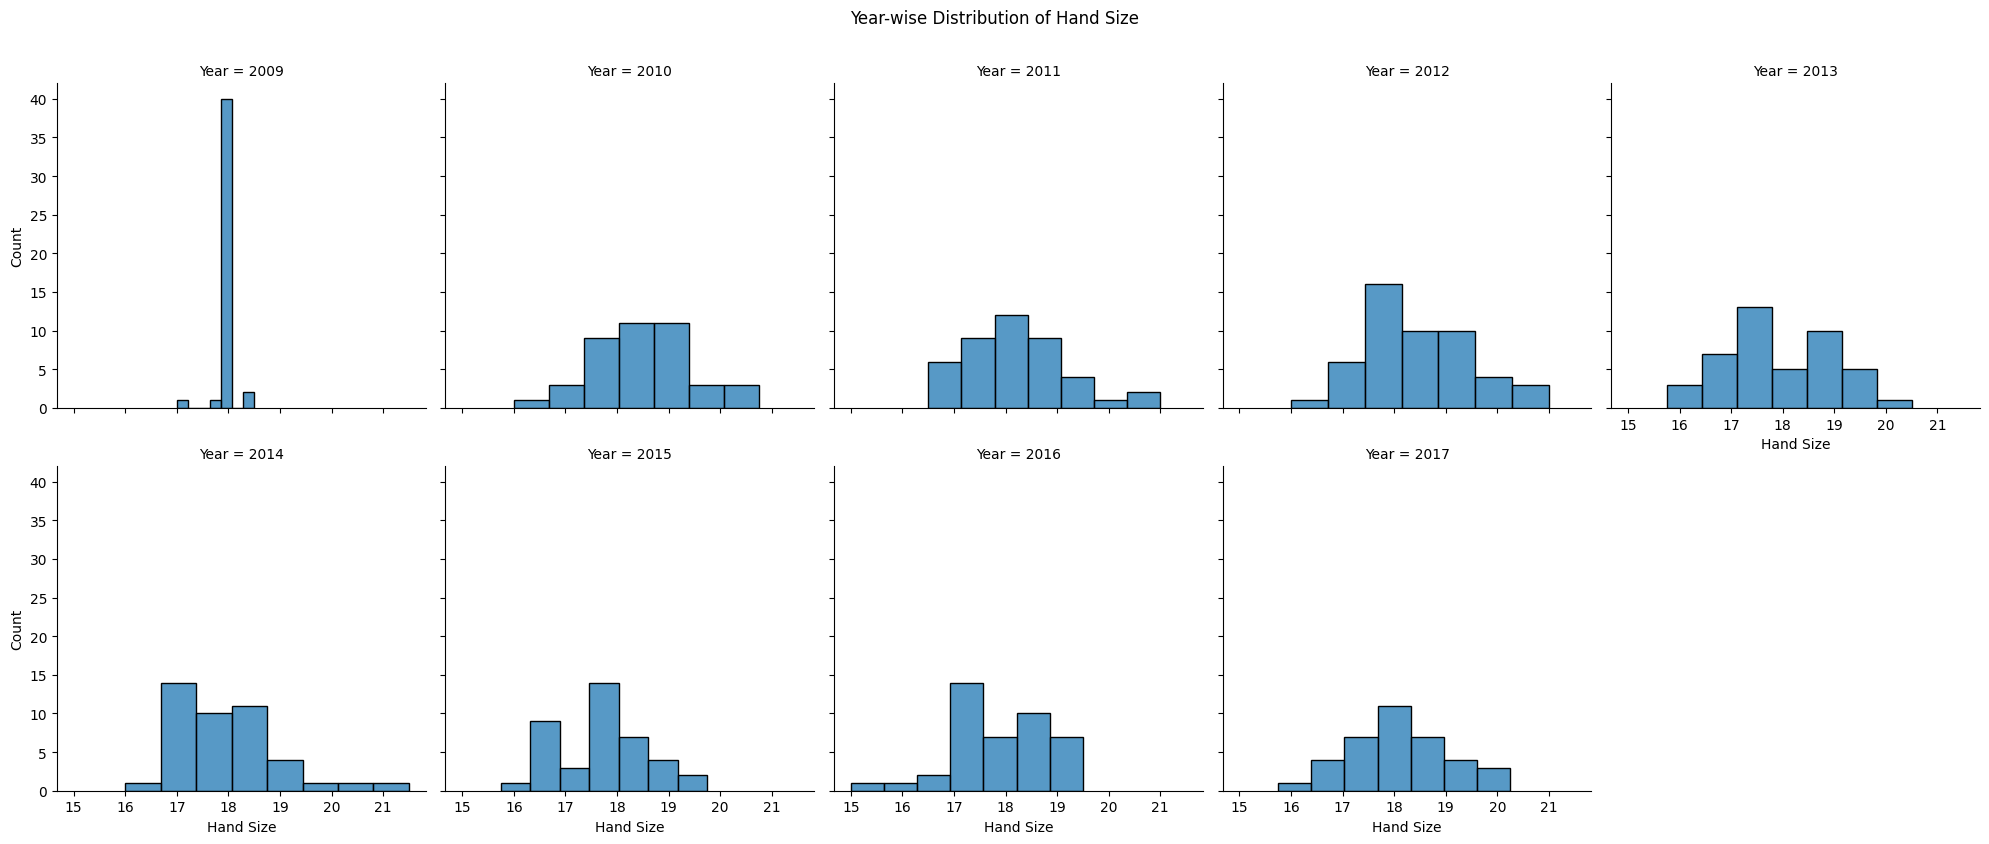

In [34]:
g = sns.FacetGrid(pick_tempered, col="Year", col_wrap=5, height=4)
g.map(sns.histplot, "Hand Size")
g.fig.suptitle('Year-wise Distribution of Hand Size', y=1.05)
plt.show()

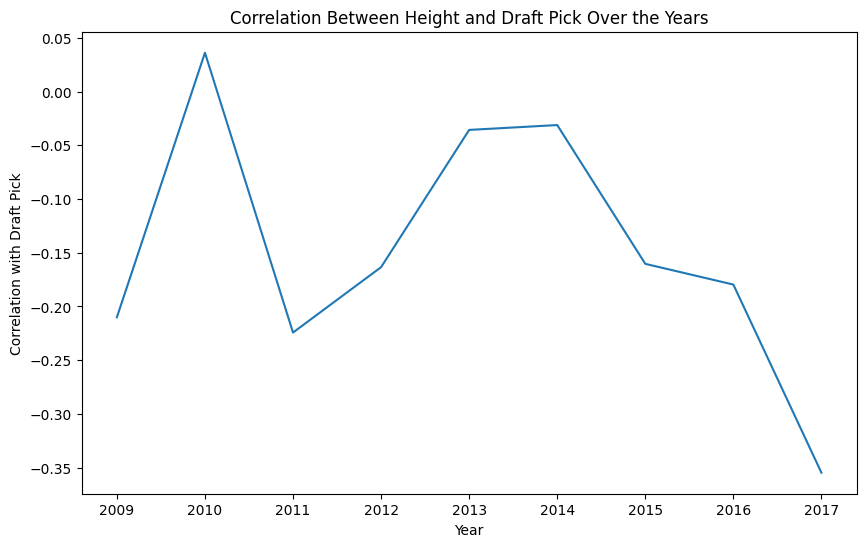

In [35]:
# Calculate correlation matrices for each year
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
correlation_by_year = df_cleaned[numeric_columns].groupby('Year').corr()

# Example: Extract correlation of "Height (With Shoes)" with "Draft pick" over the years
correlation_trend = correlation_by_year.loc[(slice(None), 'Height (With Shoes)'), 'Draft pick']

plt.figure(figsize=(10, 6))
sns.lineplot(x=correlation_trend.index.get_level_values(0), y=correlation_trend.values)
plt.title('Correlation Between Height and Draft Pick Over the Years')
plt.xlabel('Year')
plt.ylabel('Correlation with Draft Pick')
plt.show()


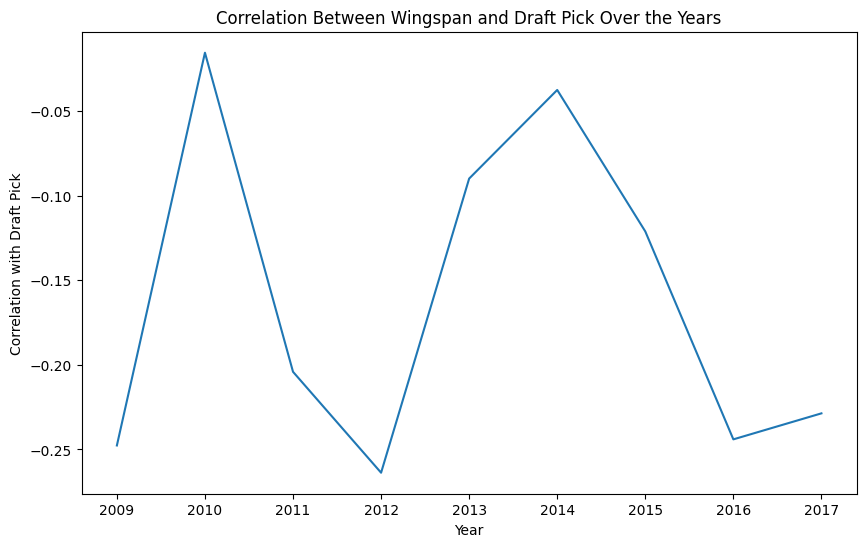

In [36]:
# Extract correlation of "Wingspan" with "Draft pick" over the years
correlation_trend_wingspan = correlation_by_year.loc[(slice(None), 'Wingspan'), 'Draft pick']

plt.figure(figsize=(10, 6))
sns.lineplot(x=correlation_trend_wingspan.index.get_level_values(0), y=correlation_trend_wingspan.values)
plt.title('Correlation Between Wingspan and Draft Pick Over the Years')
plt.xlabel('Year')
plt.ylabel('Correlation with Draft Pick')
plt.show()


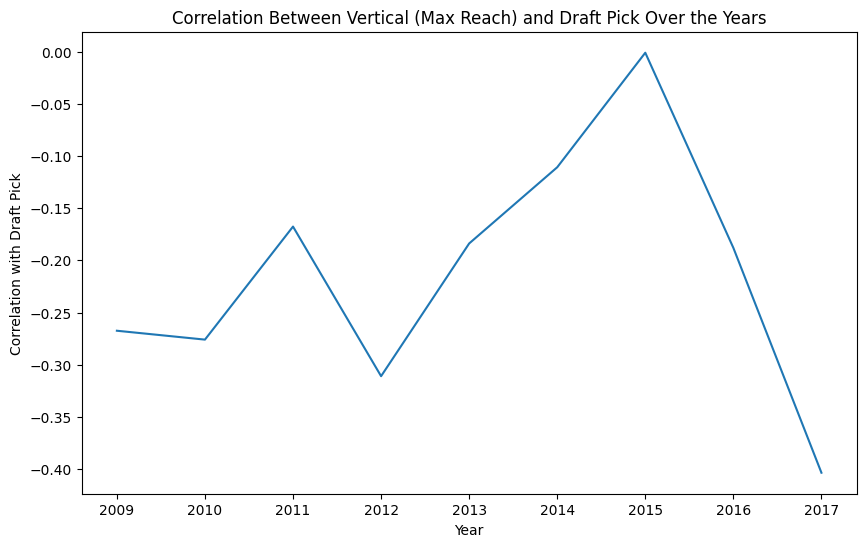

In [37]:
# Extract correlation of "Vertical (Max Reach)" with "Draft pick" over the years
correlation_trend = correlation_by_year.loc[(slice(None), 'Vertical (Max Reach)'), 'Draft pick']

plt.figure(figsize=(10, 6))
sns.lineplot(x=correlation_trend.index.get_level_values(0), y=correlation_trend.values)
plt.title('Correlation Between Vertical (Max Reach) and Draft Pick Over the Years')
plt.xlabel('Year')
plt.ylabel('Correlation with Draft Pick')
plt.show()


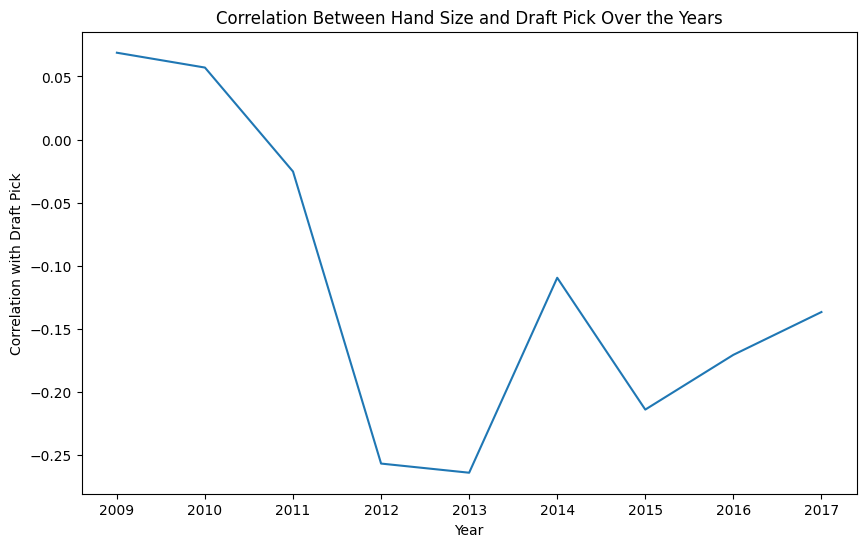

In [38]:
# Extract correlation of "Hand Size" with "Draft pick" over the years
correlation_trend = correlation_by_year.loc[(slice(None), 'Hand Size'), 'Draft pick']

plt.figure(figsize=(10, 6))
sns.lineplot(x=correlation_trend.index.get_level_values(0), y=correlation_trend.values)
plt.title('Correlation Between Hand Size and Draft Pick Over the Years')
plt.xlabel('Year')
plt.ylabel('Correlation with Draft Pick')
plt.show()


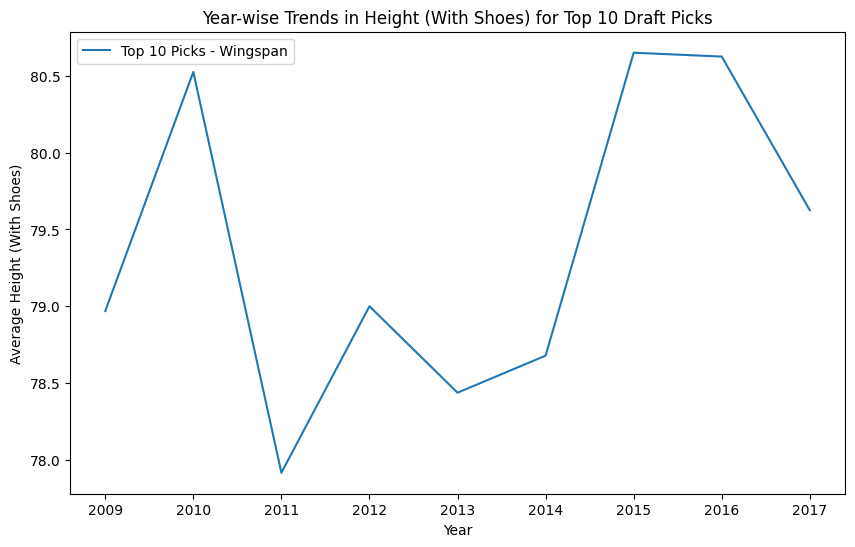

In [39]:
# Filter data for top 10 draft picks each year

top_picks = df_cleaned[df_cleaned['Draft pick'] <= 10]

# Group by Year and calculate the mean for top 10 picks
numeric_columns = pick_tempered.select_dtypes(include=[np.number]).columns
top_picks_trends = top_picks[numeric_columns].groupby('Year').mean()

# Plot trends for top players
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_picks_trends, x=top_picks_trends.index, y='Height (With Shoes)', label='Top 10 Picks - Wingspan')
plt.title('Year-wise Trends in Height (With Shoes) for Top 10 Draft Picks')
plt.xlabel('Year')
plt.ylabel('Average Height (With Shoes)')
plt.show()


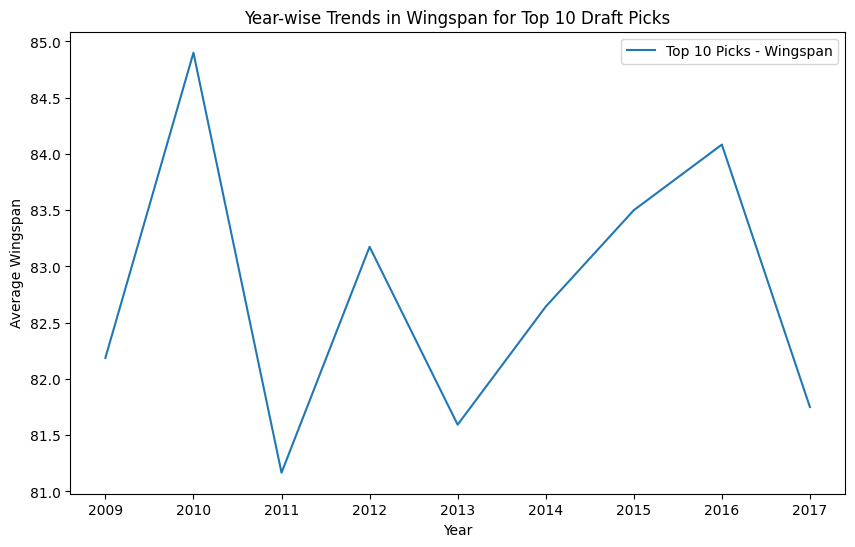

In [40]:
# Plot trends for top players
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_picks_trends, x=top_picks_trends.index, y='Wingspan', label='Top 10 Picks - Wingspan')
plt.title('Year-wise Trends in Wingspan for Top 10 Draft Picks')
plt.xlabel('Year')
plt.ylabel('Average Wingspan')
plt.show()


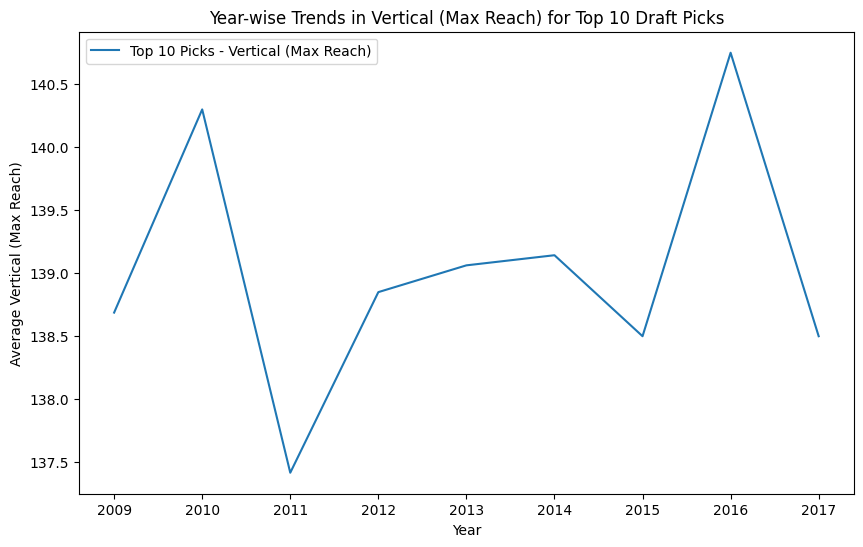

In [41]:
# Plot trends for top players
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_picks_trends, x=top_picks_trends.index, y='Vertical (Max Reach)', label='Top 10 Picks - Vertical (Max Reach)')
plt.title('Year-wise Trends in Vertical (Max Reach) for Top 10 Draft Picks')
plt.xlabel('Year')
plt.ylabel('Average Vertical (Max Reach)')
plt.show()


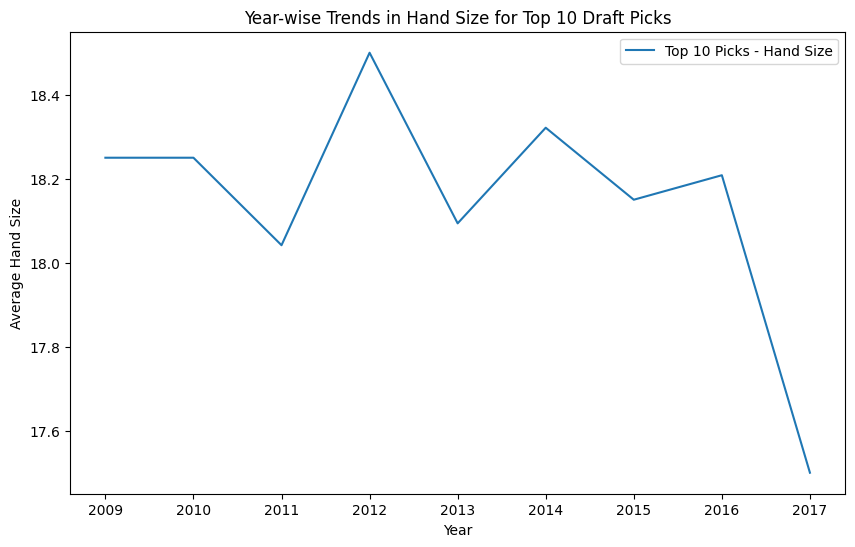

In [42]:
# Plot trends for top players
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_picks_trends, x=top_picks_trends.index, y='Hand Size', label='Top 10 Picks - Hand Size')
plt.title('Year-wise Trends in Hand Size for Top 10 Draft Picks')
plt.xlabel('Year')
plt.ylabel('Average Hand Size')
plt.show()
